### Cálculo do retorno esperado com base no CAPM para as ações da IBOVESPA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from pandas_datareader import data as pdr
import yfinance as yf
import datetime
import statsmodels.api as sm
import csv

In [3]:
# Dados dos últimos 5 anos IBOVESPA

start = datetime.datetime(2017,1,19)
end = datetime.datetime(2022,1,19)

df_bvsp = pdr.get_data_yahoo('^BVSP', start=start, end=end)

In [4]:
df_bvsp = df_bvsp.asfreq('W-FRI', method='pad')
df_bvsp = df_bvsp.drop(['High','Low','Open','Close','Volume'],axis=1)

In [5]:
df_bvsp

,Adj Close
Date,
2017-01-20,64521.0
2017-01-27,66034.0
2017-02-03,64954.0
2017-02-10,66125.0
2017-02-17,67748.0
...,...
2021-12-17,107322.0
2021-12-24,104891.0
2021-12-31,104822.0


In [6]:
retornos_BOVESPA = np.log(df_bvsp['Adj Close']).diff()
retornos_BOVESPA = retornos_BOVESPA.fillna(value=retornos_BOVESPA.mean())
ERm = retornos_BOVESPA.mean() #E(Rm) = média dos retornos
retornos_BOVESPA

Date
2017-01-20    0.001945
2017-01-27    0.023179
2017-02-03   -0.016490
2017-02-10    0.017868
2017-02-17    0.024248
                ...   
2021-12-17   -0.002745
2021-12-24   -0.022912
2021-12-31   -0.000658
2022-01-07   -0.022635
2022-01-14    0.043107
Freq: W-FRI, Name: Adj Close, Length: 261, dtype: float64

In [7]:
print(round(ERm*100,6),'%')

0.194517 %


In [8]:
yf.pdr_override() 

stocks = ['RRRP3.SA','ALPA4.SA','ABEV3.SA','AMER3.SA','ASAI3.SA','AZUL4.SA','B3SA3.SA','BIDI11.SA','BPAN4.SA','BBSE3.SA','BRML3.SA','BBDC3.SA','BBDC4.SA','BRAP4.SA'
,'BBAS3.SA','BRKM5.SA','BRFS3.SA','BPAC11.SA','CRFB3.SA','CCRO3.SA','CMIG4.SA','CIEL3.SA','COGN3.SA','CPLE6.SA','CSAN3.SA','CPFE3.SA','CMIN3.SA','CVCB3.SA','CYRE3.SA','DXCO3.SA','ECOR3.SA'
,'ELET3.SA','ELET6.SA','EMBR3.SA','ENBR3.SA','ENGI11.SA','ENEV3.SA', 'EGIE3.SA','EQTL3.SA','EZTC3.SA', 'FLRY3.SA','GGBR4.SA', 'GOAU4.SA', 'GOLL4.SA','NTCO3.SA', 'SOMA3.SA','HAPV3.SA'
,'HYPE3.SA','IGTI11.SA','GNDI3.SA','IRBR3.SA','ITSA4.SA','ITUB4.SA','JBSS3.SA','JHSF3.SA','KLBN11.SA','RENT3.SA','LCAM3.SA', 'LWSA3.SA','LAME4.SA', 'LREN3.SA', 'MGLU3.SA','MRFG3.SA'
,'CASH3.SA','BEEF3.SA', 'MRVE3.SA','MULT3.SA','PCAR3.SA','PETR3.SA','PETR4.SA', 'PRIO3.SA','PETZ3.SA', 'POSI3.SA', 'QUAL3.SA','RADL3.SA','RDOR3.SA','RAIL3.SA', 'SBSP3.SA'
,'SANB11.SA','CSNA3.SA','SULA11.SA','SUZB3.SA','TAEE11.SA','VIVT3.SA', 'TIMS3.SA','TOTS3.SA','UGPA3.SA','USIM5.SA','VALE3.SA','VIIA3.SA','VBBR3.SA', 'WEGE3.SA', 'YDUQ3.SA']

start = datetime.datetime(2017,1,19)
end = datetime.datetime(2022,1,19)

df_acoes = pdr.get_data_yahoo(stocks, start=start, end=end)

[*********************100%***********************]  93 of 93 completed


In [9]:
#código ações
# 0 = 'RRRP3' # 1 = 'ALPA4'# 2 = 'ABEV3'# 3 = 'AMER3'# 4 = 'ASAI3'# 5 = 'AZUL4'# 6 = 'B3SA3'# 7 = 'BIDI11'# 8 = 'BPAN4'# 9 = 'BBSE3'# 10 = 'BRML3'# 11 = 'BBDC3'# 12 = 'BBDC4'# 13 = 'BRAP4'# 14 = 'BBAS3'# 15 = 'BRKM5'# 16 = 'BRFS3'# 17 = 'BPAC11'
# 18 = 'CRFB3'# 19 = 'CCRO3'# 20 = 'CMIG4'# 21 = 'CIEL3'# 22 = 'COGN3'# 23 = 'CPLE6'# 24 = 'CSAN3'# 25 = 'CPFE3'# 26 = 'CMIN3'# 27 = 'CVCB3'# 28 = 'CYRE3'# 29 = 'DXCO3'# 30 = 'ECOR3'# 31 = 'ELET3'# 32 = 'ELET6'# 33 = 'EMBR3'# 34 = 'ENBR3'# 35 = 'ENGI11'
# 36 = 'ENEV3'# 37 = 'EGIE3'# 38 = 'EQTL3'# 39 = 'EZTC3'# 40 = 'FLRY3'# 41 = 'GGBR4'# 42 = 'GOAU4'# 43 = 'GOLL4'# 44 = 'NTCO3'# 45 = 'SOMA3'# 46 = 'HAPV3'# 47 = 'HYPE3'# 48 = 'IGTI11'# 49 = 'GNDI3'# 50 = 'IRBR3'# 51 = 'ITSA4'# 52 = 'ITUB4'# 53 = 'JBSS3'
# 54 = 'JHSF3'# 55 = 'KLBN11'# 56 = 'RENT3'# 57 = 'LCAM3'# 58 = 'LWSA3'# 59 = 'LAME4'# 60 = 'LREN3'# 61 = 'MGLU3'# 62 = 'MRFG3'# 63 = 'CASH3'# 64 = 'BEEF3'# 65 = 'MRVE3'# 66 = 'MULT3'# 67 = 'PCAR3'# 68 = 'PETR3'# 69 = 'PETR4'# 70 = 'PRIO3'# 71 = 'PETZ3'
# 72 = 'POSI3'# 73 = 'QUAL3'# 74 = 'RADL3'# 75 = 'RDOR3'# 76 = 'RAIL3'# 77 = 'SBSP3'# 78 = 'SANB11'# 79 = 'CSNA3'# 80 = 'SULA11'# 81 = 'SUZB3'# 82 = 'TAEE11'# 83 = 'VIVT3'# 84 = 'TIMS3'# 85 = 'TOTS3'# 86 = 'UGPA3'# 87 = 'USIM5'# 88 = 'VALE3'# 89 = 'VIIA3'# 90 = 'VBBR3'# 91 = 'WEGE3'# 92 = 'YDUQ3'

In [10]:
df_acoes = df_acoes.asfreq('W-FRI', method='pad')
df_acoes = df_acoes.drop(['High','Low','Open','Close','Volume'],axis=1)
df_acoes

Adj Close                                                       \
             ABEV3.SA   ALPA4.SA   AMER3.SA ASAI3.SA   AZUL4.SA   B3SA3.SA   
Date                                                                         
2017-01-20  14.858977   7.423822  11.438946      NaN        NaN   5.116055   
2017-01-27  14.893406   7.797253  11.998827      NaN        NaN   5.158175   
2017-02-03  14.919205   7.700161  11.825071      NaN        NaN   5.253645   
2017-02-10  14.738624   7.752441  12.703505      NaN        NaN   5.278916   
2017-02-17  15.392143   8.932486  12.355993      NaN        NaN   5.531631   
...               ...        ...        ...      ...        ...        ...   
2021-12-17  15.466399  38.708649  31.320000    14.46  25.420000  12.100827   
2021-12-24  15.550000  36.378963  30.730000    14.09  26.459999  11.329150   
2021-12-31  15.420000  36.856846  31.580000    12.96  24.360001  11.090223   
2022-01-07  14.530000  32.349998  27.700001    11.36  23.900000  11.240000   
2022-01-14  15.100000  32.099998  30.309999    12.13  26.330000  12.220000   

                                                        ...             \
             BBAS3.SA   BBDC3.SA   BBDC4.SA   BBSE3.SA  ...   TIMS3.SA   
Date                                                    ...              
2017-01-20  22.844625  14.654728  16.055147  18.624548  ...   7.603501   
2017-01-27  24.432451  15.208182  16.778442  19.605867  ...   7.794240   
2017-02-03  24.043274  14.876683  16.287926  18.828991  ...   8.054337   
2017-02-10  24.269001  14.704511  16.563135  18.788101  ...   8.392462   
2017-02-17  25.615551  14.834799  16.772083  20.168625  ...   8.539852   
...               ...        ...        ...        ...  ...        ...   
2021-12-17  30.330000  16.602234  19.558229  20.540001  ...  12.816306   
2021-12-24  29.219999  16.233063  19.221460  20.620001  ...  12.870000   
2021-12-31  28.850000  16.173126  19.191488  20.750000  ...  13.150000   
2022-01-07  28.629999  16.750000  20.230000  19.799999  ...  12.430000   
2022-01-14  30.410000  17.440001  20.870001  19.450001  ...  12.630000   

                                                                             \
             TOTS3.SA   UGPA3.SA   USIM5.SA   VALE3.SA   VBBR3.SA  VIIA3.SA   
Date                                                                          
2017-01-20   8.251827  31.326405   4.317018  23.479952        NaN  3.144438   
2017-01-27   8.613499  31.467081   4.648406  24.650295        NaN  3.204142   
2017-02-03   8.413628  31.232611   4.648406  22.390076        NaN  3.263847   
2017-02-10   8.153478  31.424889   4.809623  23.991978        NaN  3.691729   
2017-02-17   8.216928  31.865707   4.881275  24.920933        NaN  3.641976   
...               ...        ...        ...        ...        ...       ...   
2021-12-17  29.553711  15.190000  15.540000  79.169998  22.100000  4.850000   
2021-12-24  28.608072  14.270000  14.860000  79.150002  21.040001  4.500000   
2021-12-31  28.639999  14.540000  15.160000  77.959999  21.400000  5.250000   
2022-01-07  25.100000  12.950000  14.680000  84.000000  19.170000  4.170000   
2022-01-14  25.200001  13.160000  16.450001  84.690002  19.830000  3.970000   

                                             
             VIVT3.SA   WEGE3.SA   YDUQ3.SA  
Date                                         
2017-01-20  24.633806   5.528002  14.376774  
2017-01-27  25.253687   5.778625  14.542124  
2017-02-03  25.637751   5.818008  13.480400  
2017-02-10  25.765774   5.843070  12.792892  
2017-02-17  25.637751   6.054309  13.663157  
...               ...        ...        ...  
2021-12-17  47.884346  34.817997  21.690001  
2021-12-24  48.487152  33.470001  20.330000  
2021-12-31  48.189999  32.980000  20.559999  
2022-01-07  46.660000  29.410000  18.809999  
2022-01-14  46.880001  30.700001  18.900000  

[261 rows x 93 columns]

In [11]:
retornos = np.log(df_acoes['Adj Close']).diff()
retornos = retornos.fillna(value=retornos.mean())
retornos

,ABEV3.SA,ALPA4.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-20,0.000009,0.005562,0.003564,-0.006276,0.000342,0.003281,0.001171,0.000856,0.001249,0.000179,...,0.002068,0.004012,-0.003273,0.004616,0.004680,0.000933,0.000745,0.002557,0.006498,0.000502
2017-01-27,0.002314,0.049078,0.047785,-0.006276,0.000342,0.008199,0.067196,0.037071,0.044065,0.051348,...,0.024776,0.042896,0.004481,0.073959,0.048642,0.000933,0.018809,0.024852,0.044339,0.011436
2017-02-03,0.001731,-0.012530,-0.014587,-0.006276,0.000342,0.018339,-0.016057,-0.022038,-0.029671,-0.040431,...,0.032826,-0.023478,-0.007479,0.000000,-0.096171,0.000933,0.018462,0.015094,0.006792,-0.075813
2017-02-10,-0.012178,0.006767,0.071656,-0.006276,0.000342,0.004799,0.009345,-0.011641,0.016755,-0.002174,...,0.041123,-0.031408,0.006137,0.034094,0.069102,0.000933,0.123188,0.004981,0.004298,-0.052347
2017-02-17,0.043386,0.141687,-0.027737,-0.006276,0.000342,0.046762,0.054000,0.008821,0.012536,0.070904,...,0.017410,0.007752,0.013930,0.014788,0.037989,0.000933,-0.013569,-0.004981,0.035514,0.065813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-17,0.007495,-0.043781,0.094353,-0.006892,-0.017934,-0.005670,-0.063659,-0.021153,-0.019486,-0.029266,...,-0.014454,-0.085185,-0.005907,0.034040,0.045480,-0.027521,-0.122126,0.003050,-0.026895,-0.102868
2021-12-24,0.005391,-0.062072,-0.019018,-0.025921,0.040098,-0.065895,-0.037284,-0.022487,-0.017369,0.003887,...,0.004181,-0.032520,-0.062478,-0.044744,-0.000253,-0.049152,-0.074901,0.012510,-0.039485,-0.064754
2021-12-31,-0.008395,0.013051,0.027285,-0.083598,-0.082692,-0.021315,-0.012743,-0.003699,-0.001561,0.006285,...,0.021523,0.001115,0.018744,0.019987,-0.015149,0.016965,0.154151,-0.006147,-0.014748,0.011250


In [12]:
df_16acoes = retornos[['ABEV3.SA','B3SA3.SA','BBAS3.SA','BBDC4.SA','ITSA4.SA','ITUB4.SA','PETR3.SA','PETR4.SA','VALE3.SA','JBSS3.SA','LREN3.SA','RAIL3.SA','SANB11.SA','SUZB3.SA','CCRO3.SA','EQTL3.SA']]
df_16acoes

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,ITSA4.SA,ITUB4.SA,PETR3.SA,PETR4.SA,VALE3.SA,JBSS3.SA,LREN3.SA,RAIL3.SA,SANB11.SA,SUZB3.SA,CCRO3.SA,EQTL3.SA
Date,,,,,,,,,,,,,,,,
2017-01-20,0.000009,0.003281,0.001171,0.001249,0.001974,0.000862,0.003569,0.003682,0.004680,0.004619,0.001102,0.003019,0.001401,0.004638,-0.000732,0.002794
2017-01-27,0.002314,0.008199,0.067196,0.044065,0.016296,0.038853,-0.042974,-0.024037,0.048642,-0.011657,0.035192,0.054937,0.024661,0.000000,-0.003221,0.027998
2017-02-03,0.001731,0.018339,-0.016057,-0.029671,0.022377,0.006690,-0.044292,-0.018088,-0.096171,0.042630,-0.008480,0.010376,0.021284,0.000000,0.040460,-0.003457
2017-02-10,-0.012178,0.004799,0.009345,0.016755,0.023947,0.045190,0.000612,0.015524,0.069102,-0.032629,0.002430,0.073370,0.065912,0.000000,0.068249,-0.009744
2017-02-17,0.043386,0.046762,0.054000,0.012536,0.044273,0.019529,0.022378,0.001924,0.037989,-0.000830,0.042762,0.092691,0.002027,0.000000,0.070920,0.019395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-17,0.007495,-0.005670,-0.063659,-0.019486,-0.014168,-0.032564,-0.022480,-0.022511,0.045480,0.078149,-0.079104,0.012135,-0.008838,0.050173,-0.028400,-0.015596
2021-12-24,0.005391,-0.065895,-0.037284,-0.017369,-0.010590,-0.005141,-0.011432,-0.023030,-0.000253,0.018192,-0.076938,-0.031749,-0.034514,-0.021694,-0.019111,-0.038541
2021-12-31,-0.008395,-0.021315,-0.012743,-0.001561,-0.006696,-0.018445,0.008505,0.004227,-0.015149,0.006079,0.011109,0.005080,-0.010889,-0.001330,-0.028075,-0.001768


In [13]:
print(round(df_16acoes.mean()*100,6), 'em percentual(%)')

ABEV3.SA     0.000901
B3SA3.SA     0.328067
BBAS3.SA     0.117065
BBDC4.SA     0.124921
ITSA4.SA     0.197406
ITUB4.SA     0.086244
PETR3.SA     0.356884
PETR4.SA     0.368243
VALE3.SA     0.468047
JBSS3.SA     0.461942
LREN3.SA     0.110182
RAIL3.SA     0.301901
SANB11.SA    0.140050
SUZB3.SA     0.463795
CCRO3.SA    -0.073241
EQTL3.SA     0.279432
dtype: float64 em percentual(%)


In [14]:
df = pd.concat([retornos_BOVESPA,retornos],axis=1)
df = df.rename(columns={'Adj Close': 'BVSP'})
df = df.fillna(value=retornos.mean())
df = df.dropna()
df

,BVSP,ABEV3.SA,ALPA4.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-20,0.001945,0.000009,0.005562,0.003564,-0.006276,0.000342,0.003281,0.001171,0.000856,0.001249,...,0.002068,0.004012,-0.003273,0.004616,0.004680,0.000933,0.000745,0.002557,0.006498,0.000502
2017-01-27,0.023179,0.002314,0.049078,0.047785,-0.006276,0.000342,0.008199,0.067196,0.037071,0.044065,...,0.024776,0.042896,0.004481,0.073959,0.048642,0.000933,0.018809,0.024852,0.044339,0.011436
2017-02-03,-0.016490,0.001731,-0.012530,-0.014587,-0.006276,0.000342,0.018339,-0.016057,-0.022038,-0.029671,...,0.032826,-0.023478,-0.007479,0.000000,-0.096171,0.000933,0.018462,0.015094,0.006792,-0.075813
2017-02-10,0.017868,-0.012178,0.006767,0.071656,-0.006276,0.000342,0.004799,0.009345,-0.011641,0.016755,...,0.041123,-0.031408,0.006137,0.034094,0.069102,0.000933,0.123188,0.004981,0.004298,-0.052347
2017-02-17,0.024248,0.043386,0.141687,-0.027737,-0.006276,0.000342,0.046762,0.054000,0.008821,0.012536,...,0.017410,0.007752,0.013930,0.014788,0.037989,0.000933,-0.013569,-0.004981,0.035514,0.065813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-17,-0.002745,0.007495,-0.043781,0.094353,-0.006892,-0.017934,-0.005670,-0.063659,-0.021153,-0.019486,...,-0.014454,-0.085185,-0.005907,0.034040,0.045480,-0.027521,-0.122126,0.003050,-0.026895,-0.102868
2021-12-24,-0.022912,0.005391,-0.062072,-0.019018,-0.025921,0.040098,-0.065895,-0.037284,-0.022487,-0.017369,...,0.004181,-0.032520,-0.062478,-0.044744,-0.000253,-0.049152,-0.074901,0.012510,-0.039485,-0.064754
2021-12-31,-0.000658,-0.008395,0.013051,0.027285,-0.083598,-0.082692,-0.021315,-0.012743,-0.003699,-0.001561,...,0.021523,0.001115,0.018744,0.019987,-0.015149,0.016965,0.154151,-0.006147,-0.014748,0.011250


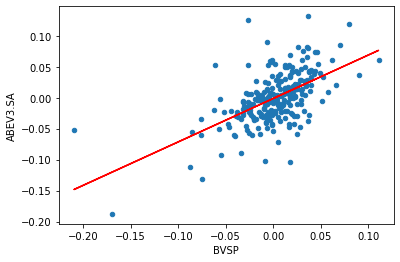

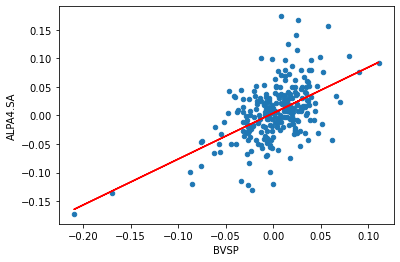

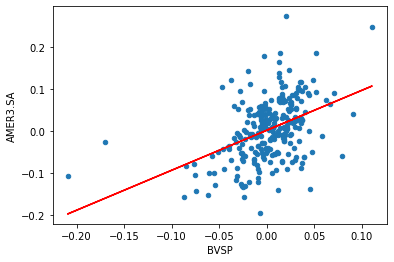

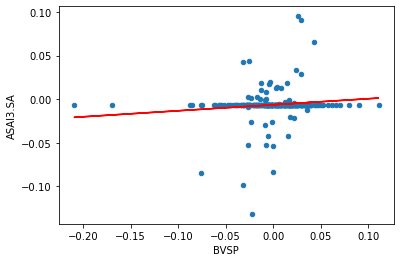

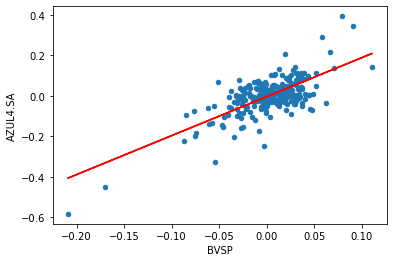

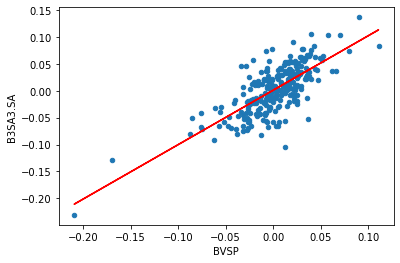

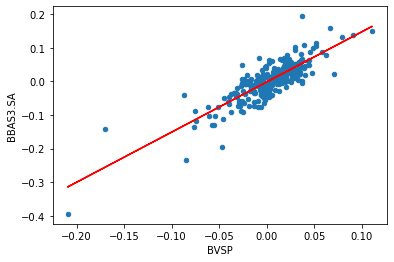

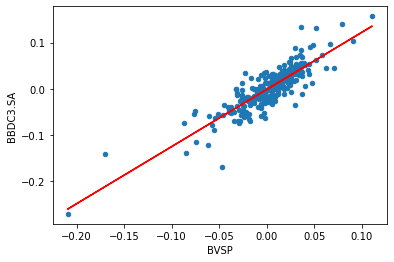

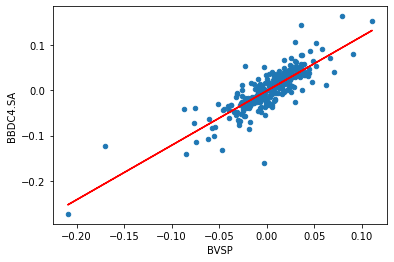

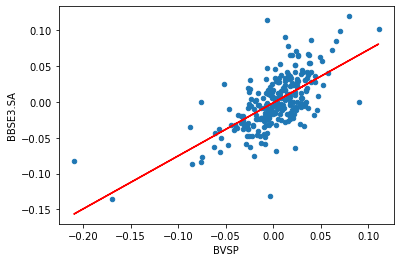

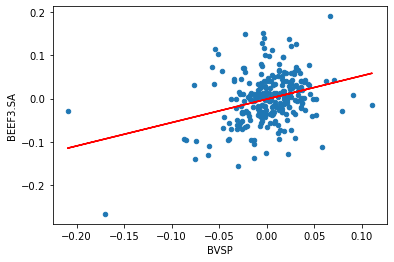

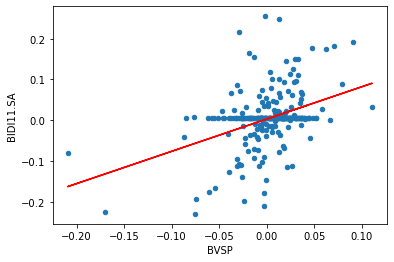

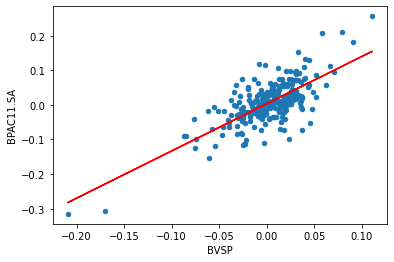

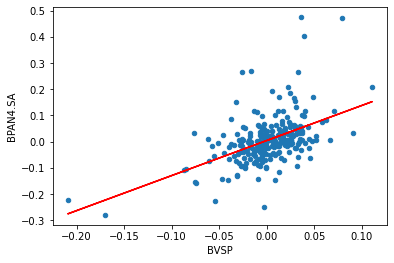

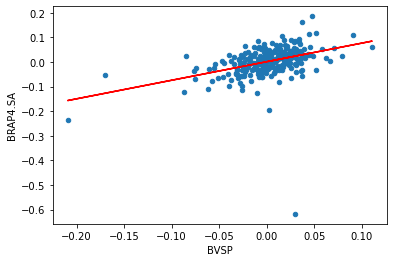

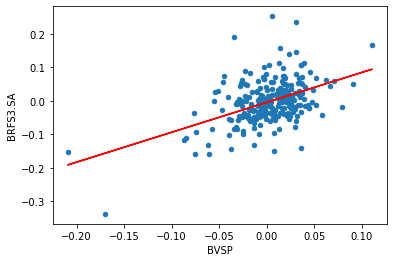

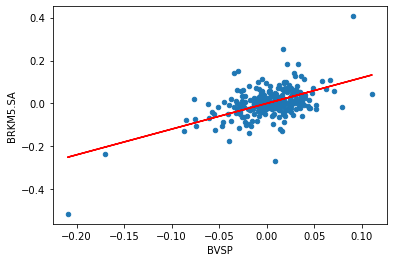

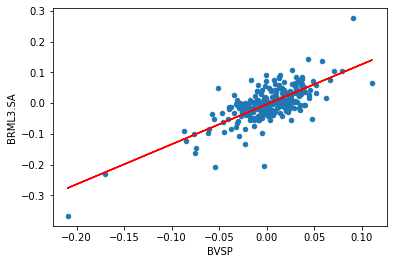

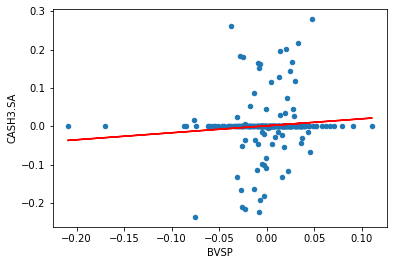

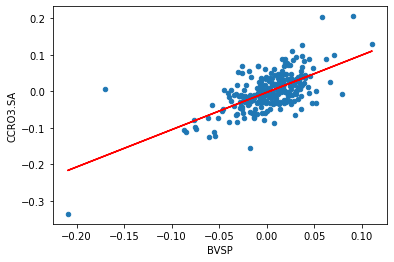

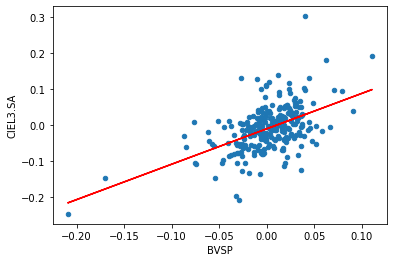

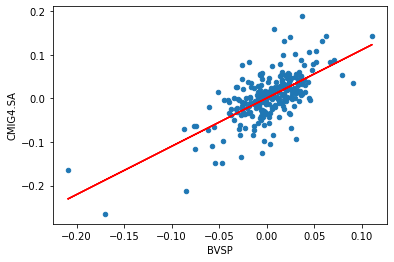

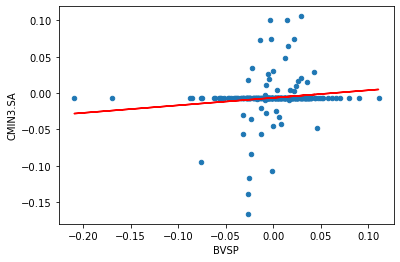

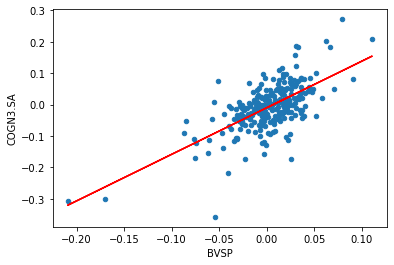

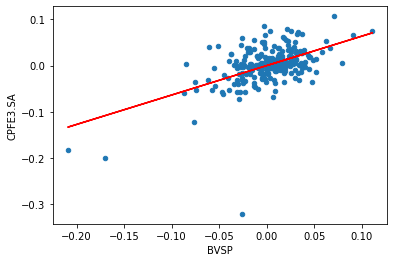

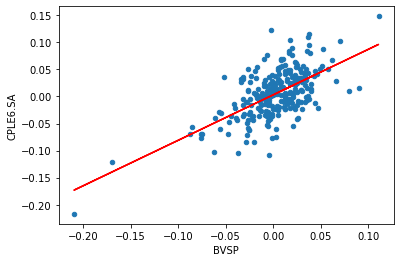

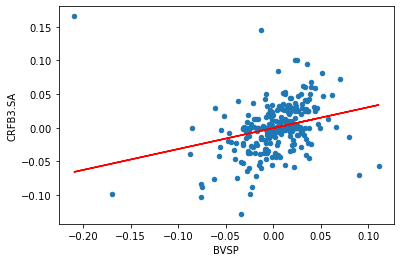

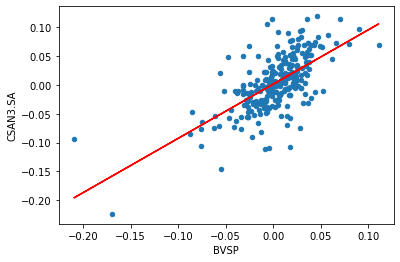

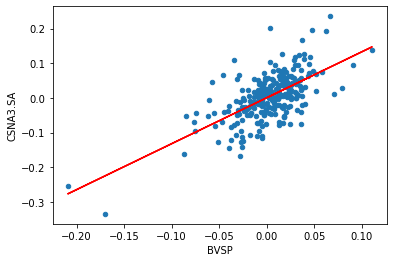

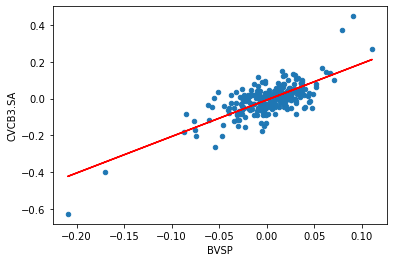

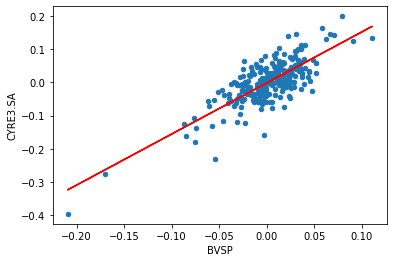

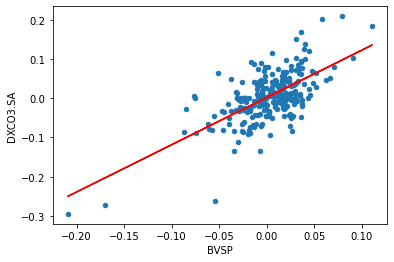

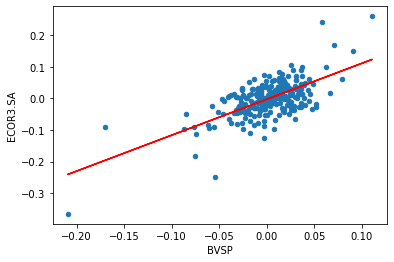

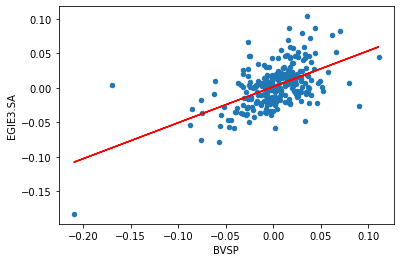

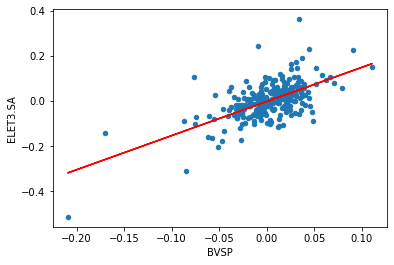

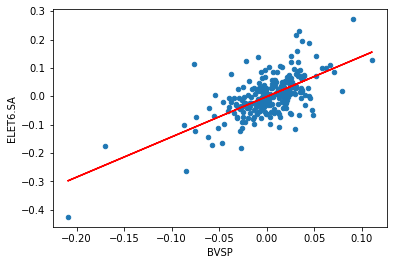

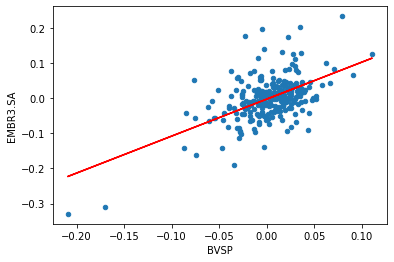

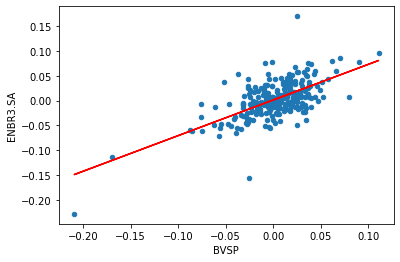

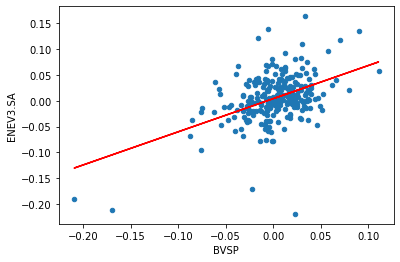

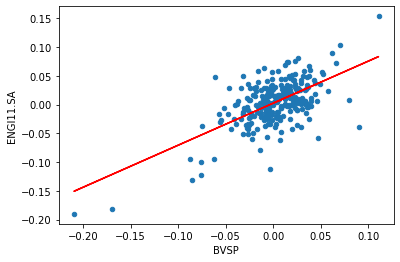

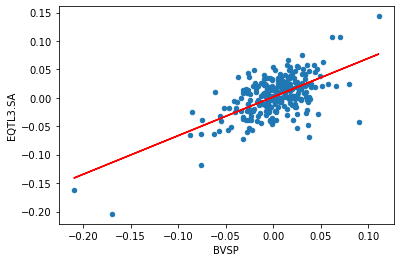

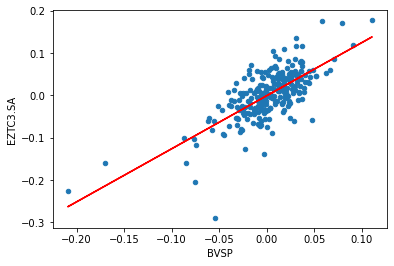

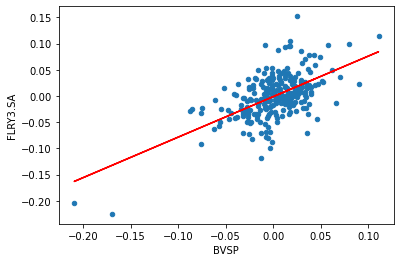

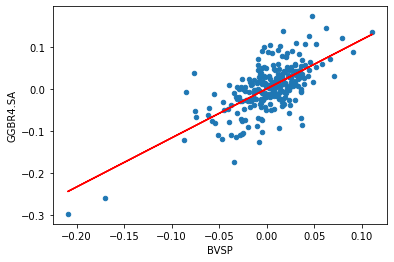

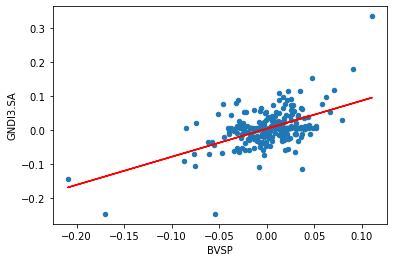

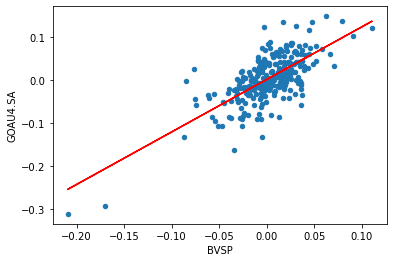

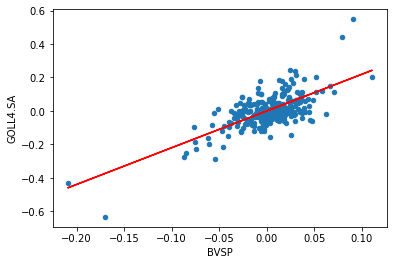

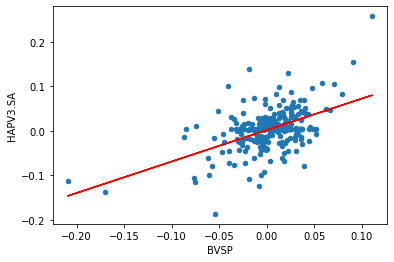

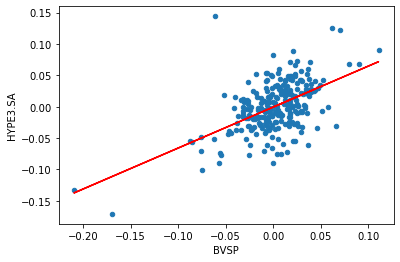

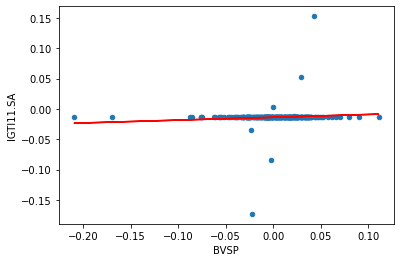

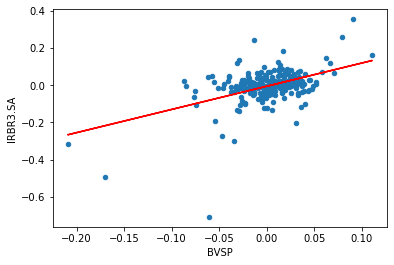

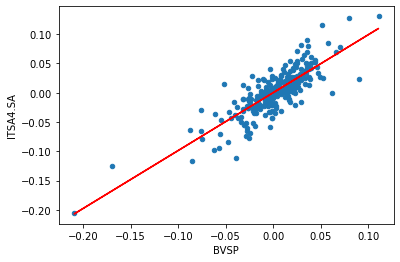

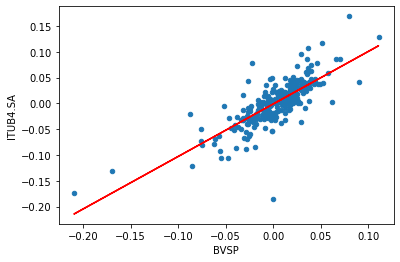

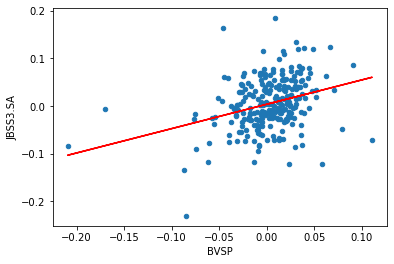

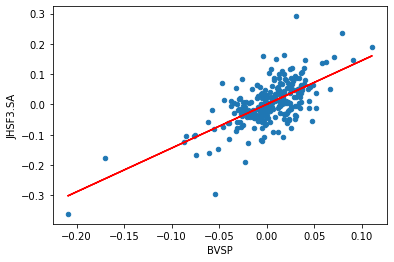

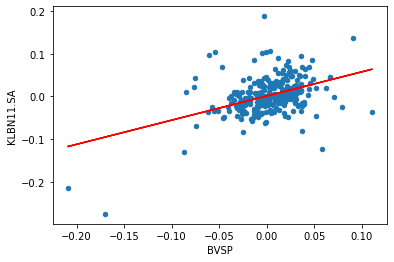

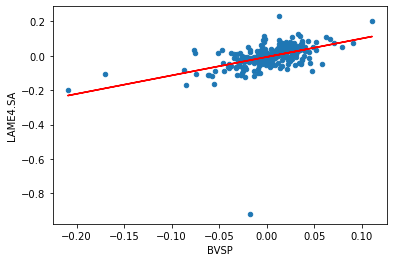

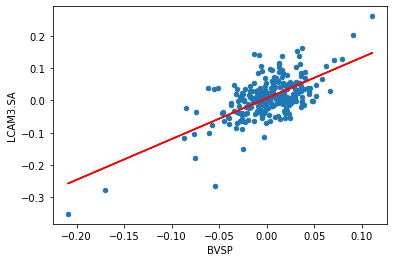

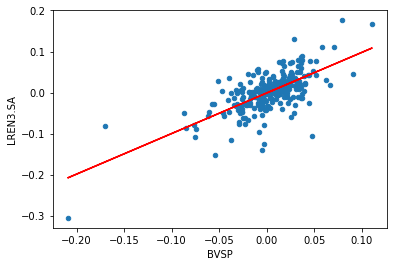

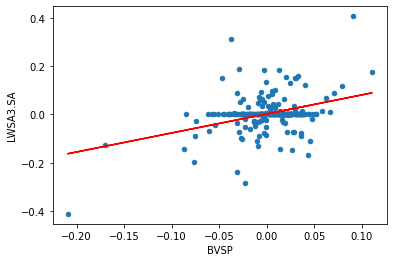

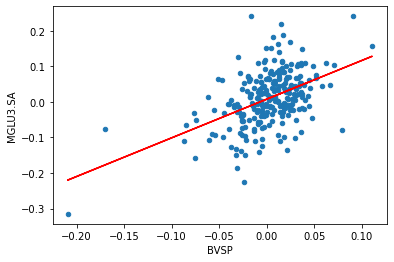

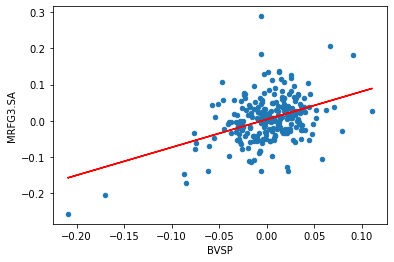

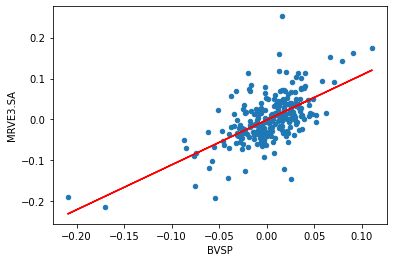

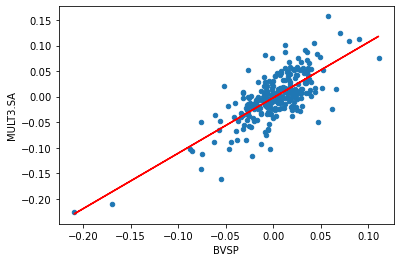

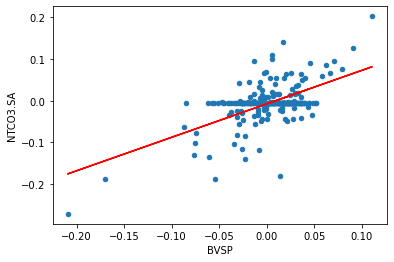

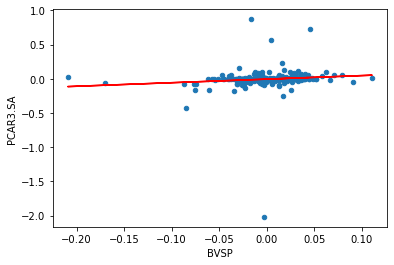

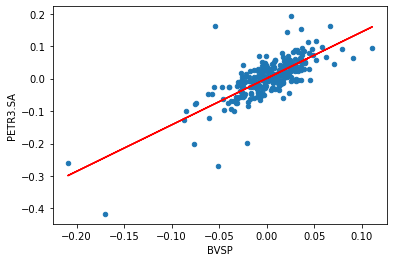

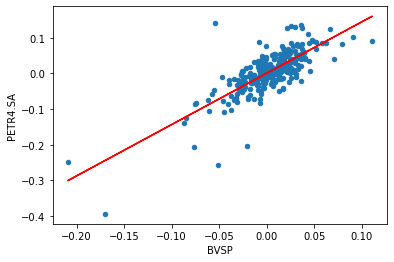

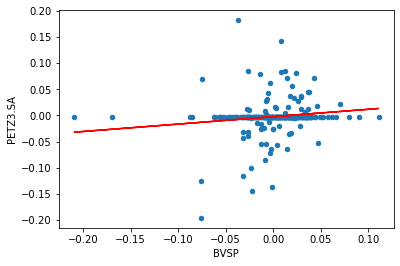

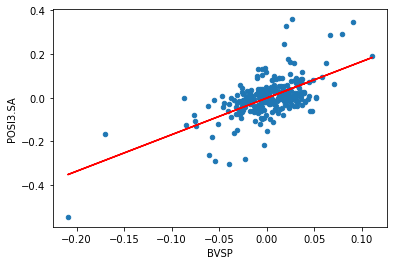

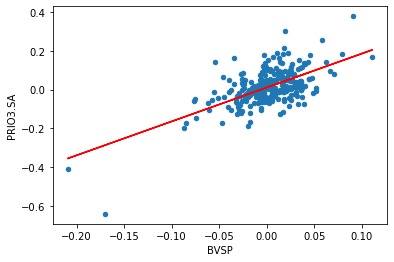

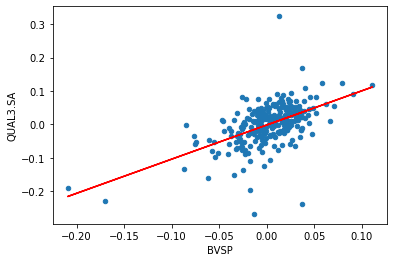

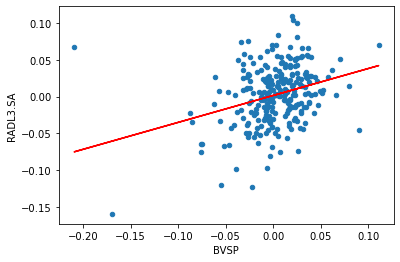

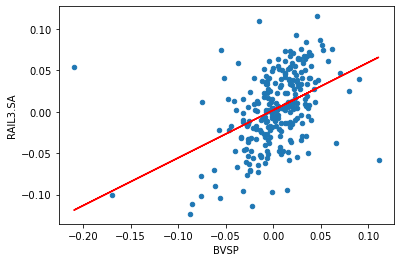

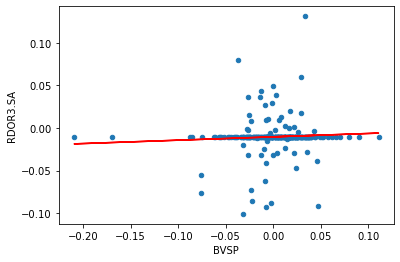

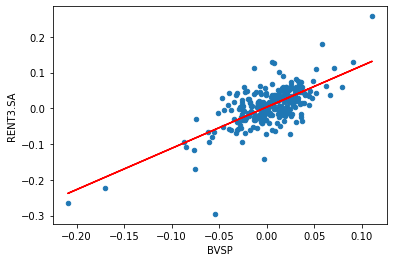

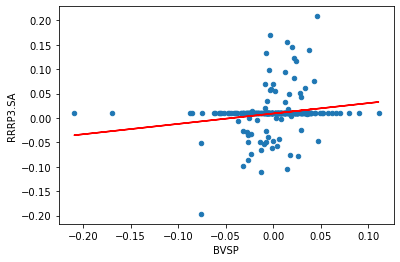

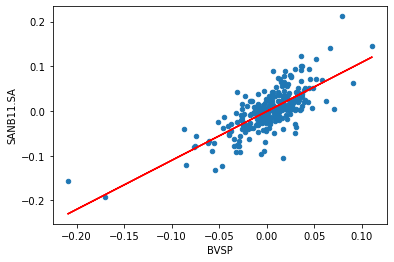

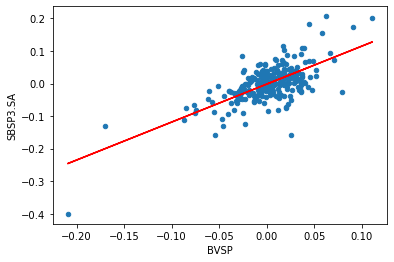

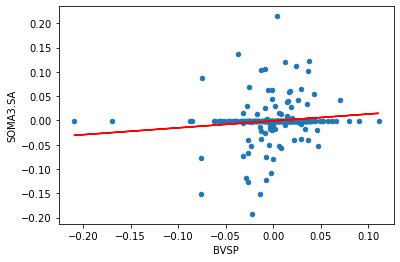

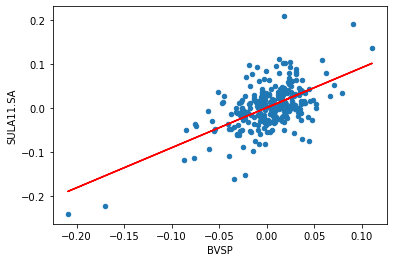

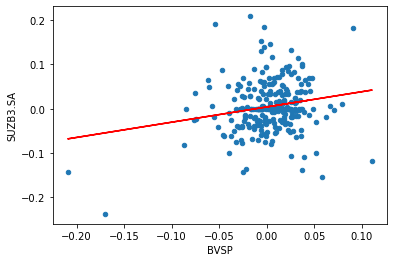

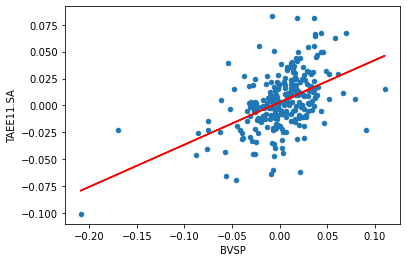

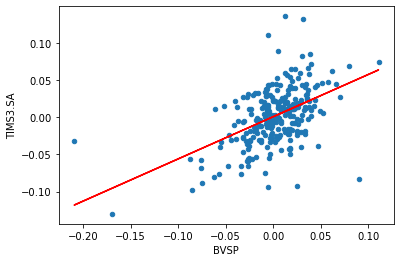

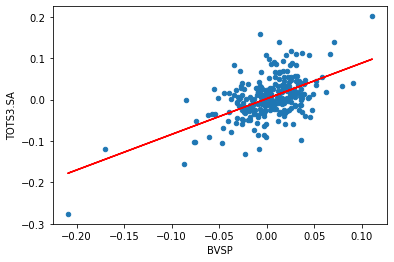

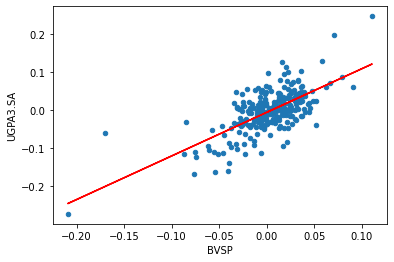

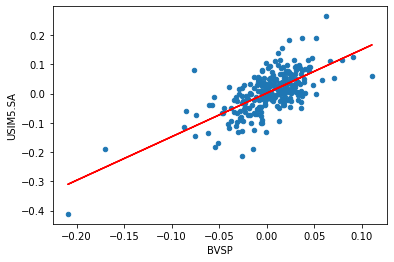

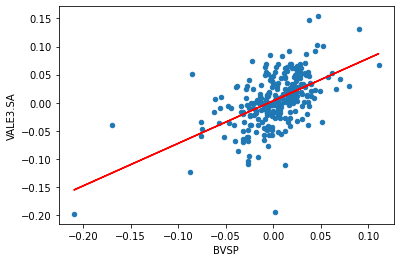

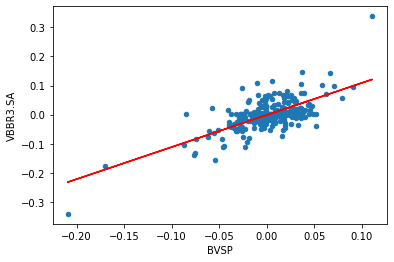

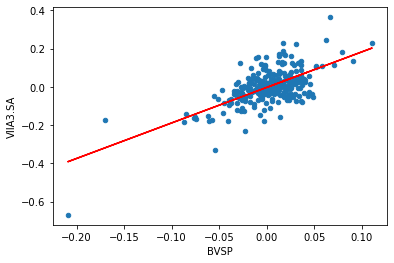

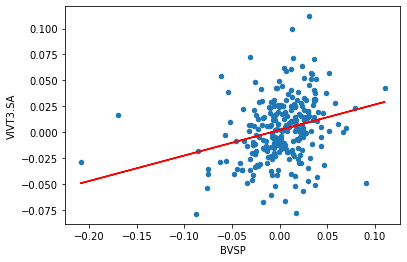

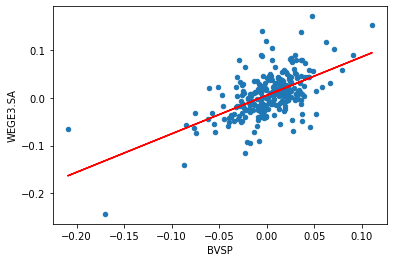

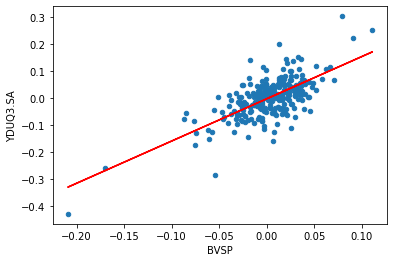

In [15]:
beta = {}
alpha = {}

for i in df.columns:
  if i != 'BVSP':
    df.plot(kind = 'scatter', x = 'BVSP', y = i)
    b, a = np.polyfit(df['BVSP'], df[i], 1)
    plt.plot(df['BVSP'], b * df['BVSP'] + a, '-', color = 'r')  
    beta[i] = b    
    alpha[i] = a
    plt.savefig('{i}.png'.format(i=i)) #salvar cada imagem em png
    plt.show()

In [16]:
beta

{'ABEV3.SA': 0.7012547616723354,
 'ALPA4.SA': 0.8040031873576392,
 'AMER3.SA': 0.9501102473971098,
 'ASAI3.SA': 0.06916529345033658,
 'AZUL4.SA': 1.9248391952605022,
 'B3SA3.SA': 1.0160185116701232,
 'BBAS3.SA': 1.4920588046034013,
 'BBDC3.SA': 1.241466234907647,
 'BBDC4.SA': 1.2053999113339022,
 'BBSE3.SA': 0.7403279675370165,
 'BEEF3.SA': 0.5425602468285259,
 'BIDI11.SA': 0.7918308962752493,
 'BPAC11.SA': 1.3660638254127975,
 'BPAN4.SA': 1.338348795939809,
 'BRAP4.SA': 0.7556678091907725,
 'BRFS3.SA': 0.8938086328388755,
 'BRKM5.SA': 1.2001569768325027,
 'BRML3.SA': 1.3003041105986082,
 'CASH3.SA': 0.181906642293841,
 'CCRO3.SA': 1.0236749898561102,
 'CIEL3.SA': 0.9852516599499296,
 'CMIG4.SA': 1.108971022777579,
 'CMIN3.SA': 0.1036279720954266,
 'COGN3.SA': 1.4830180277390086,
 'CPFE3.SA': 0.6357630636992229,
 'CPLE6.SA': 0.841397688173919,
 'CRFB3.SA': 0.31058233983806344,
 'CSAN3.SA': 0.9430661997769996,
 'CSNA3.SA': 1.3256124407493914,
 'CVCB3.SA': 1.9831829172527704,
 'CYRE3.SA'

In [17]:
resbeta = {i : round(beta[i], 6) for i in beta}
resbeta

{'ABEV3.SA': 0.701255,
 'ALPA4.SA': 0.804003,
 'AMER3.SA': 0.95011,
 'ASAI3.SA': 0.069165,
 'AZUL4.SA': 1.924839,
 'B3SA3.SA': 1.016019,
 'BBAS3.SA': 1.492059,
 'BBDC3.SA': 1.241466,
 'BBDC4.SA': 1.2054,
 'BBSE3.SA': 0.740328,
 'BEEF3.SA': 0.54256,
 'BIDI11.SA': 0.791831,
 'BPAC11.SA': 1.366064,
 'BPAN4.SA': 1.338349,
 'BRAP4.SA': 0.755668,
 'BRFS3.SA': 0.893809,
 'BRKM5.SA': 1.200157,
 'BRML3.SA': 1.300304,
 'CASH3.SA': 0.181907,
 'CCRO3.SA': 1.023675,
 'CIEL3.SA': 0.985252,
 'CMIG4.SA': 1.108971,
 'CMIN3.SA': 0.103628,
 'COGN3.SA': 1.483018,
 'CPFE3.SA': 0.635763,
 'CPLE6.SA': 0.841398,
 'CRFB3.SA': 0.310582,
 'CSAN3.SA': 0.943066,
 'CSNA3.SA': 1.325612,
 'CVCB3.SA': 1.983183,
 'CYRE3.SA': 1.53663,
 'DXCO3.SA': 1.205176,
 'ECOR3.SA': 1.137504,
 'EGIE3.SA': 0.521204,
 'ELET3.SA': 1.513211,
 'ELET6.SA': 1.418876,
 'EMBR3.SA': 1.055823,
 'ENBR3.SA': 0.719183,
 'ENEV3.SA': 0.64272,
 'ENGI11.SA': 0.730956,
 'EQTL3.SA': 0.680792,
 'EZTC3.SA': 1.253671,
 'FLRY3.SA': 0.774178,
 'GGBR4.SA': 1

In [18]:
alpha

{'ABEV3.SA': -0.0013550519583033754,
 'ALPA4.SA': 0.003997651103702987,
 'AMER3.SA': 0.0017157890887995063,
 'ASAI3.SA': -0.0064110339298262846,
 'AZUL4.SA': -0.0034025900435364965,
 'B3SA3.SA': 0.0013043375437801106,
 'BBAS3.SA': -0.0017316564009528248,
 'BBDC3.SA': -0.0015588439348811277,
 'BBDC4.SA': -0.0010955019764629622,
 'BBSE3.SA': -0.001260637006352875,
 'BEEF3.SA': -0.0013309569691369095,
 'BIDI11.SA': 0.0030840577704604084,
 'BPAC11.SA': 0.0035865911700522493,
 'BPAN4.SA': 0.004299942558483733,
 'BRAP4.SA': 0.0016330371138879051,
 'BRFS3.SA': -0.004146269155848149,
 'BRKM5.SA': -0.0001553165646433136,
 'BRML3.SA': -0.0035186325903026855,
 'CASH3.SA': 0.0015111924685198227,
 'CCRO3.SA': -0.0027236363845776655,
 'CIEL3.SA': -0.009986572456592265,
 'CMIG4.SA': 0.0010649443631302001,
 'CMIN3.SA': -0.006507280186413376,
 'COGN3.SA': -0.010188341667072656,
 'CPFE3.SA': -2.1216507668155193e-05,
 'CPLE6.SA': 0.0030415897362608088,
 'CRFB3.SA': -0.0004920770970923733,
 'CSAN3.SA': 0.

In [19]:
resalfa = {i : round(alpha[i], 6) for i in beta}
resalfa

{'ABEV3.SA': -0.001355,
 'ALPA4.SA': 0.003998,
 'AMER3.SA': 0.001716,
 'ASAI3.SA': -0.006411,
 'AZUL4.SA': -0.003403,
 'B3SA3.SA': 0.001304,
 'BBAS3.SA': -0.001732,
 'BBDC3.SA': -0.001559,
 'BBDC4.SA': -0.001096,
 'BBSE3.SA': -0.001261,
 'BEEF3.SA': -0.001331,
 'BIDI11.SA': 0.003084,
 'BPAC11.SA': 0.003587,
 'BPAN4.SA': 0.0043,
 'BRAP4.SA': 0.001633,
 'BRFS3.SA': -0.004146,
 'BRKM5.SA': -0.000155,
 'BRML3.SA': -0.003519,
 'CASH3.SA': 0.001511,
 'CCRO3.SA': -0.002724,
 'CIEL3.SA': -0.009987,
 'CMIG4.SA': 0.001065,
 'CMIN3.SA': -0.006507,
 'COGN3.SA': -0.010188,
 'CPFE3.SA': -2.1e-05,
 'CPLE6.SA': 0.003042,
 'CRFB3.SA': -0.000492,
 'CSAN3.SA': 0.00161,
 'CSNA3.SA': 0.000511,
 'CVCB3.SA': -0.007106,
 'CYRE3.SA': -0.00166,
 'DXCO3.SA': 0.002112,
 'ECOR3.SA': -0.002565,
 'EGIE3.SA': 0.001548,
 'ELET3.SA': -0.000937,
 'ELET6.SA': -0.00099,
 'EMBR3.SA': -0.001916,
 'ENBR3.SA': 0.001175,
 'ENEV3.SA': 0.004186,
 'ENGI11.SA': 0.002341,
 'EQTL3.SA': 0.00147,
 'EZTC3.SA': -0.001003,
 'FLRY3.SA': -

In [20]:
lista = list(beta.keys())
ER = {}

rf = 0.05893509 #Média da taxa DI no período
rm = df['BVSP'].mean()*54.1429

for i in lista:
  ER[i] = rf + (beta[i] * (rm-rf)) + alpha[i]

for i in lista:
    print('Retorno esperado com base no CAPM para o ativo {} é {}%'.format(i, round(ER[i]*100,4)))

Retorno esperado com base no CAPM para o ativo ABEV3.SA é 9.0106%
Retorno esperado com base no CAPM para o ativo ALPA4.SA é 10.0224%
Retorno esperado com base no CAPM para o ativo AMER3.SA é 10.4719%
Retorno esperado com base no CAPM para o ativo ASAI3.SA é 5.5732%
Retorno esperado com base no CAPM para o ativo AZUL4.SA é 14.4811%
Retorno esperado com base no CAPM para o ativo B3SA3.SA é 10.7365%
Retorno esperado com base no CAPM para o ativo BBAS3.SA é 12.6408%
Retorno esperado com base no CAPM para o ativo BBDC3.SA é 11.4958%
Retorno esperado com base no CAPM para o ativo BBDC4.SA é 11.3749%
Retorno esperado com base no CAPM para o ativo BBSE3.SA é 9.2012%
Retorno esperado com base no CAPM para o ativo BEEF3.SA é 8.2769%
Retorno esperado com base no CAPM para o ativo BIDI11.SA é 9.8746%
Retorno esperado com base no CAPM para o ativo BPAC11.SA é 12.5883%
Retorno esperado com base no CAPM para o ativo BPAN4.SA é 12.5311%
Retorno esperado com base no CAPM para o ativo BRAP4.SA é 9.5618%

In [21]:
valores = []
for i in lista:
    valores.append(round(ER[i]*100,4))
    
df_valores = pd.DataFrame (valores, columns = ['valores'])
print('Média', df_valores.mean())
print('Desvio padrão', df_valores.std())
print('Mínimo', df_valores.min())
print('Máximo', df_valores.max())

Média valores    10.298474
dtype: float64
Desvio padrão valores    2.181656
dtype: float64
Mínimo valores    4.7227
dtype: float64
Máximo valores    16.0289
dtype: float64
